In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import timeit
import statsmodels.api as sm

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
#loading data into a dataframe
data = pd.read_csv("/content/drive/MyDrive/574/Credit Card Clients.csv").drop(columns=['ID', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

#EDA

Describe the dataset: There are 3000 distinct credit card clients.

The average value for the amount of credit card limit is 167485. The standard deviation is large, max value being 1,000,000.

Education Level is mostly graduate school and university.

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [12]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04,30000.00000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,51223.330900,49179.075167,4.701315e+04,5663.580500,5.921163e+03,5225.68150,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,73635.860576,71173.768783,6.934939e+04,16563.280354,2.304087e+04,17606.96147,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,0.000000,0.000000e+00,0.00000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,1000.000000,8.330000e+02,390.00000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,2100.000000,2.009000e+03,1800.00000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,5006.000000,5.000000e+03,4505.00000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,873552.000000,1.684259e+06,896040.00000,1.000000


Number of Male credit holder is less than Female

Text(0.5, 1.0, 'SEX v/s COUNT')

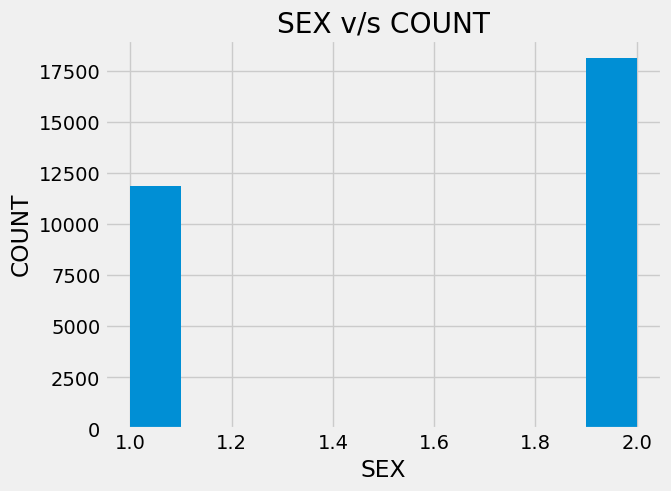

In [13]:
plt.style.use('fivethirtyeight')
data['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Number of defaulters are about four times the number of non - defaulters

Text(0.5, 1.0, 'Default Credit Card Clients (Default = 0, Not Default = 1)')

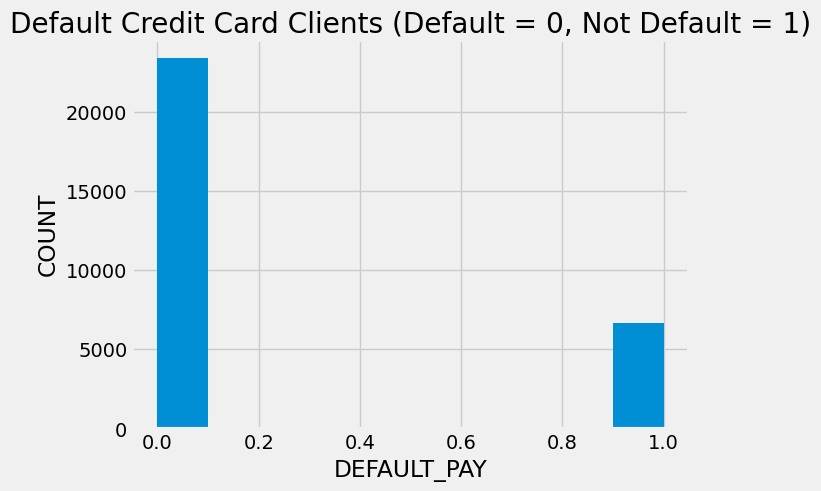

In [14]:
plt.style.use('fivethirtyeight')
data['default payment next month'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients (Default = 0, Not Default = 1)')

Most of the credit holders are University students followed by Graduates and then High school students

Text(0.5, 1.0, 'EDUCATION v/s COUNT - 1=graduate, 2=university, 3=high school, 4, 5, 6 =others/unkown')

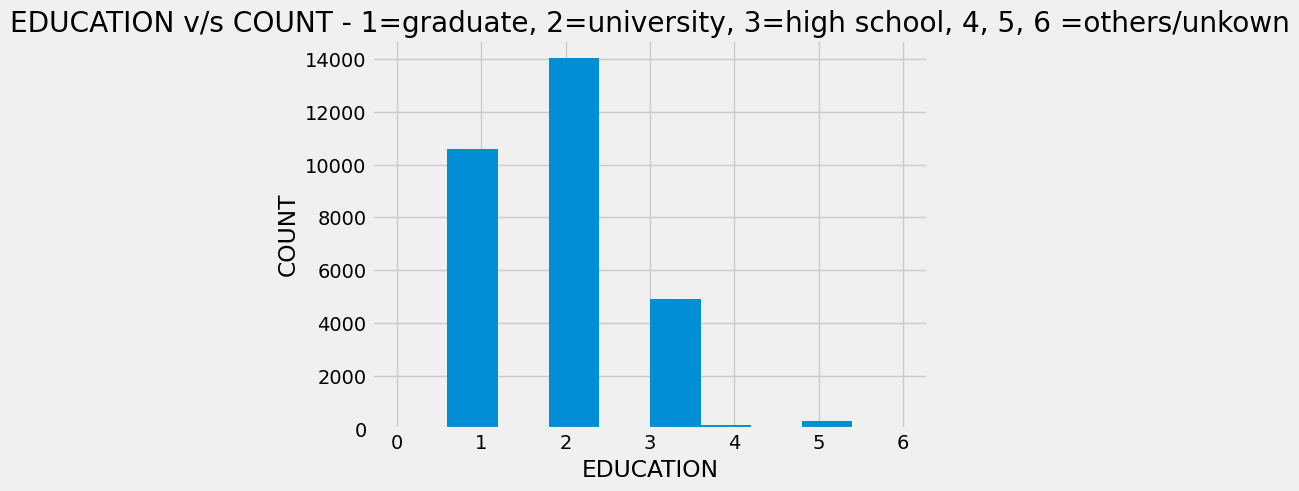

In [15]:
plt.style.use('fivethirtyeight')
data['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT - 1=graduate, 2=university, 3=high school, 4, 5, 6 =others/unkown')

Graph depicts that females have overall less default payments compared to males, Non-Defaults have a higher proportion of Females (Sex=2)

<Axes: xlabel='SEX', ylabel='count'>

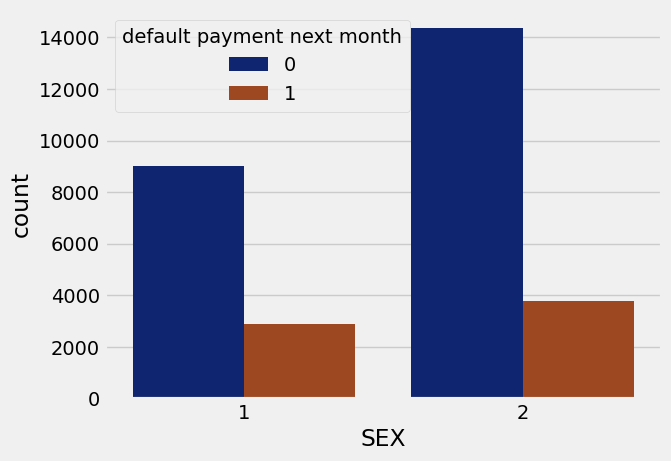

In [16]:
# Checking the number of counts of defaulters and non defaulters sexwise
sns.countplot(x='SEX', data=data,hue="default payment next month", palette="dark")

From the Plot we can see that NonDefaults have a higher proportion of Females age between 30-40years

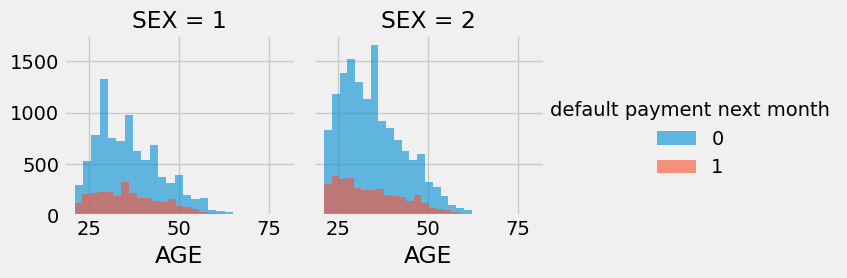

In [17]:
g = sns.FacetGrid(data, col='SEX', hue='default payment next month')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

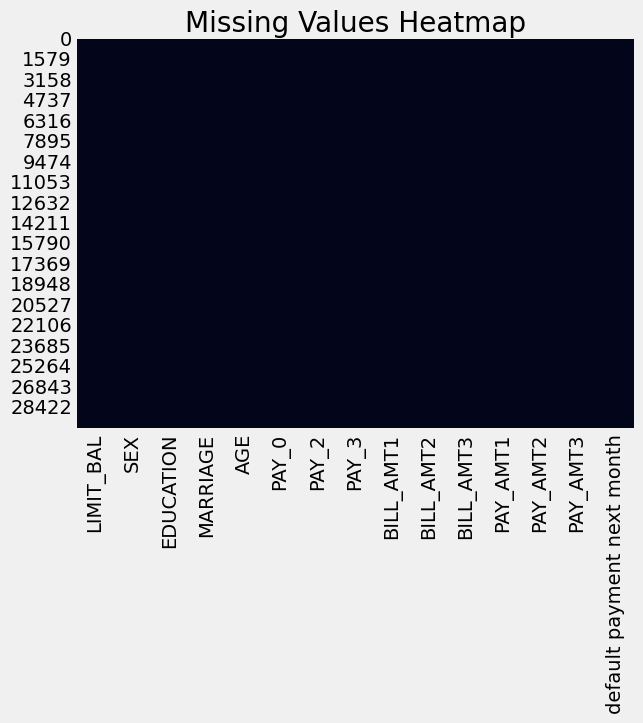

In [18]:
# Check missing values
missing_values = data.isnull().sum()

# Visualize missing value pattern using a heatmap
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values: Delete rows or columns if needed, to drop rows with any NaN values:
data = data.dropna()

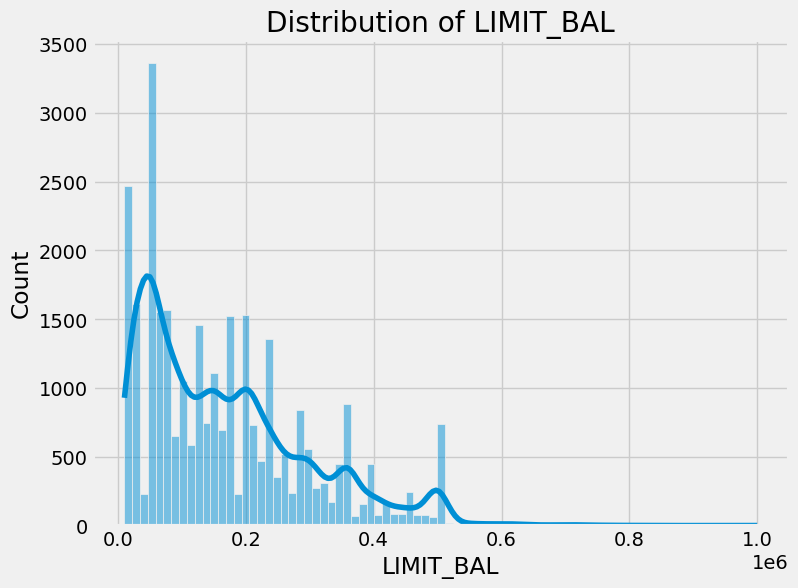

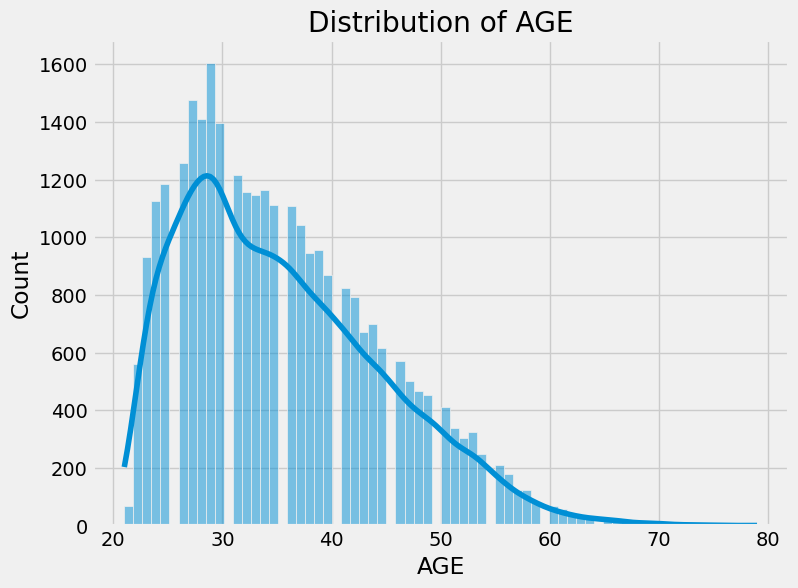

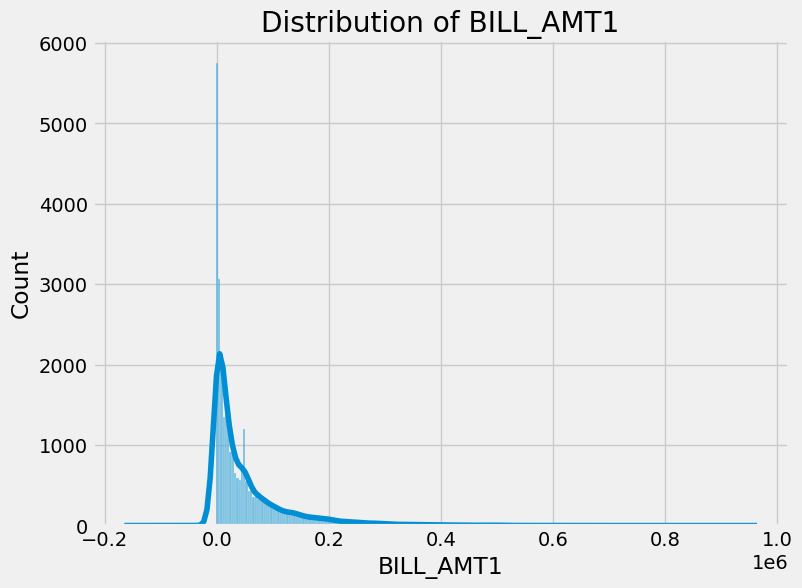

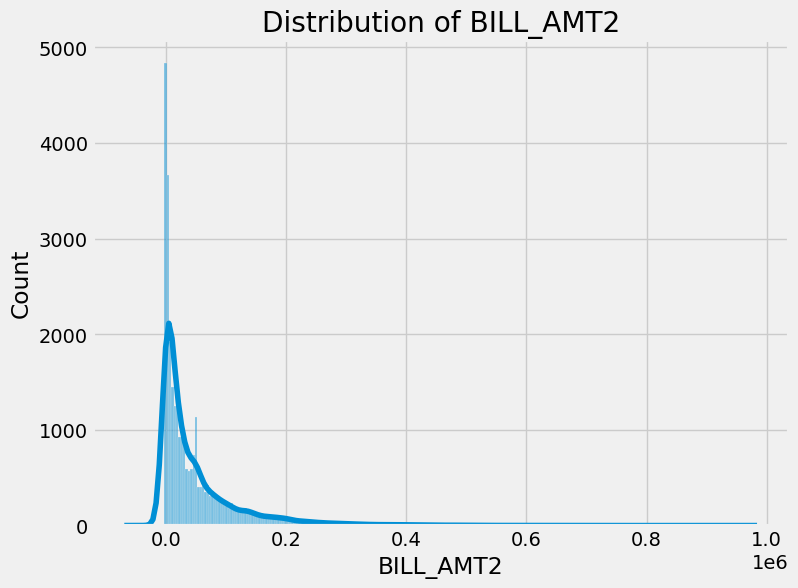

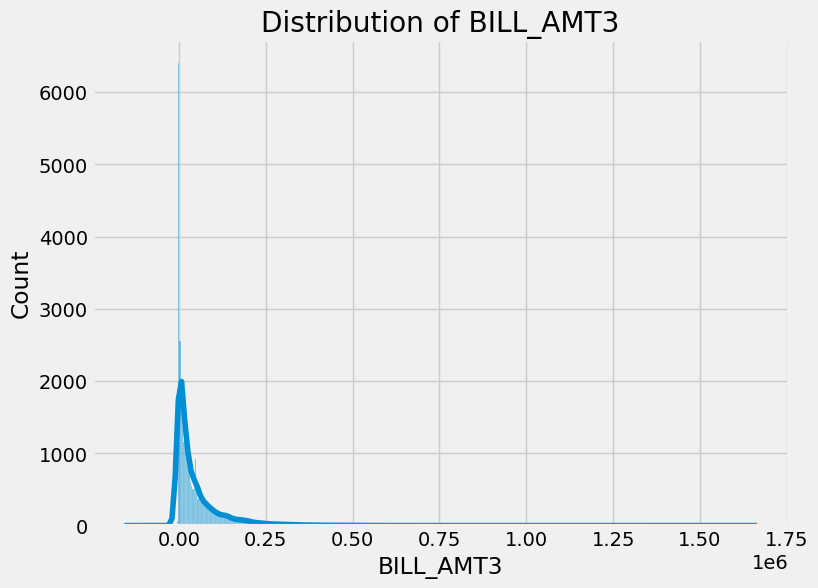

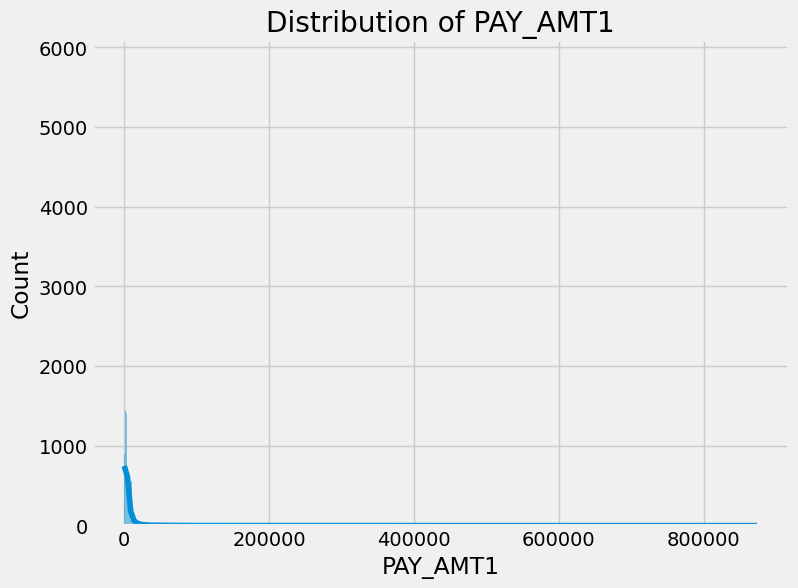

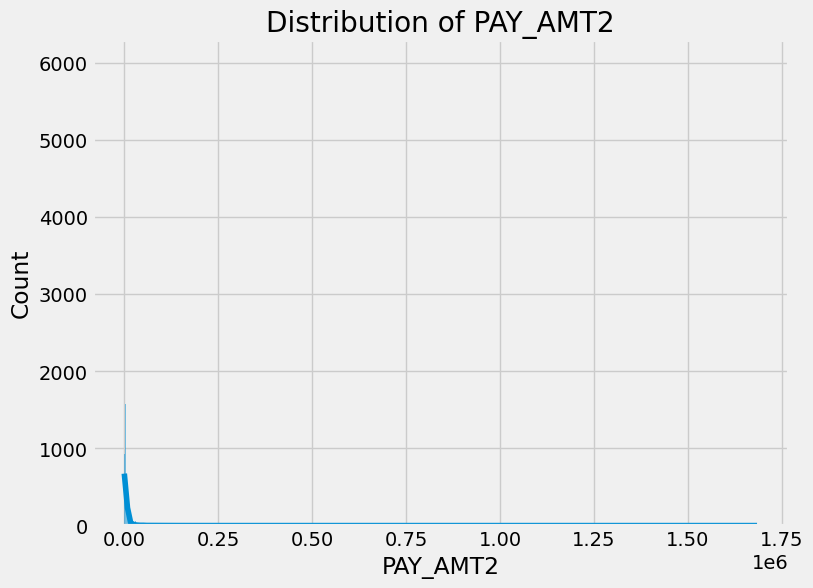

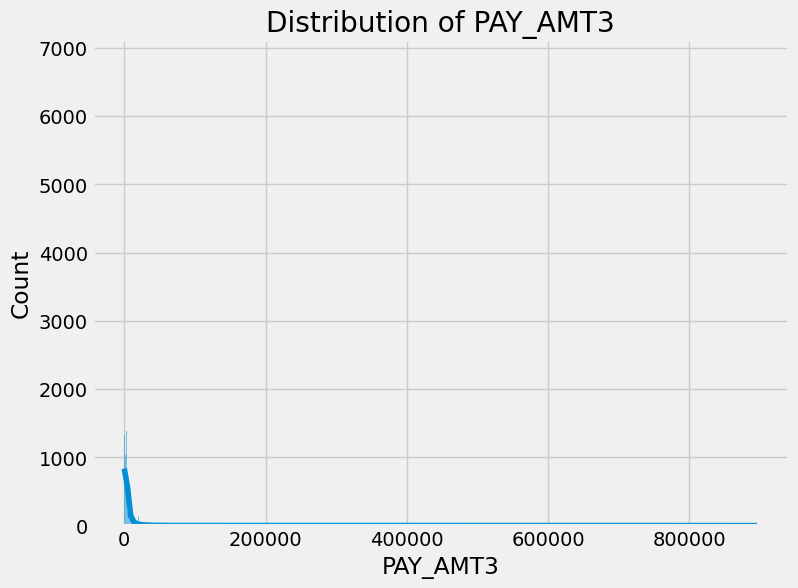

In [ ]:
#Step 2
## Identify continuous columns
continuous_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']

# Visualizing and handling outliers for each continuous column
for col in continuous_cols:
    plt.figure(figsize=(8, 6))

    # Plot histogram to visualize distribution
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


In [23]:
def update_categories(data, column_name):
    # Calculate the frequency of each category in the specified column
    category_counts = data[column_name].value_counts()

    # Identify categories with counts less than 50
    categories_to_update = category_counts[category_counts < 50].index

    # Update the categories with counts less than 50 to 99
    data.loc[data[column_name].isin(categories_to_update), column_name] = 99

    return data

#Step 3 part 2
# Identifying categorical columns
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'default payment next month']

updated_data = data
# Display frequency table for each categorical column
for col in categorical_cols:
  updated_data = update_categories(updated_data,col)


#Step 3
# Identifying categorical columns
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3']

# Display frequency table for each categorical column
for col in categorical_cols:
    freq_table = updated_data[col].value_counts()
    print(f'Frequency table for {col}:\n{freq_table}\n')

Frequency table for SEX:
2    18112
1    11888
Name: SEX, dtype: int64

Frequency table for EDUCATION:
2     14030
1     10585
3      4917
5       280
4       123
6        51
99       14
Name: EDUCATION, dtype: int64

Frequency table for MARRIAGE:
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Frequency table for PAY_0:
 0     14737
-1      5686
 1      3688
-2      2759
 2      2667
 3       322
 4        76
 99       65
Name: PAY_0, dtype: int64

Frequency table for PAY_2:
 0     15730
-1      6050
 2      3927
-2      3782
 3       326
 4        99
 99       86
Name: PAY_2, dtype: int64

Frequency table for PAY_3:
 0     15764
-1      5938
-2      4085
 2      3819
 3       240
 99       78
 4        76
Name: PAY_3, dtype: int64



In [27]:
# Step 4
# Create dummy variables for categorical columns
data_with_dummies = pd.get_dummies(data, columns=categorical_cols, dtype='int64').drop(columns=['EDUCATION_5','EDUCATION_6','MARRIAGE_0', 'PAY_0_0', 'PAY_2_0', 'PAY_3_0'])

# Display the dataset with dummy variables
print(data_with_dummies.columns)

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'default payment next month', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_99', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_99',
       'PAY_2_-2', 'PAY_2_-1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_99',
       'PAY_3_-2', 'PAY_3_-1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_99'],
      dtype='object')


Pairwise Correlation Table:
                            LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  \
LIMIT_BAL                    1.000000  0.144713   0.285430   0.278314   
AGE                          0.144713  1.000000   0.056239   0.054283   
BILL_AMT1                    0.285430  0.056239   1.000000   0.951484   
BILL_AMT2                    0.278314  0.054283   0.951484   1.000000   
BILL_AMT3                    0.283236  0.053710   0.892279   0.928326   
PAY_AMT1                     0.195236  0.026147   0.140277   0.280365   
PAY_AMT2                     0.178408  0.021785   0.099355   0.100851   
PAY_AMT3                     0.210167  0.029247   0.156887   0.150718   
default payment next month  -0.153520  0.013890  -0.019644  -0.014193   
SEX_1                       -0.024755  0.090874   0.033642   0.031183   
SEX_2                        0.024755 -0.090874  -0.033642  -0.031183   
EDUCATION_1                  0.258777 -0.100423  -0.024045  -0.020334   
EDUCATION_2            

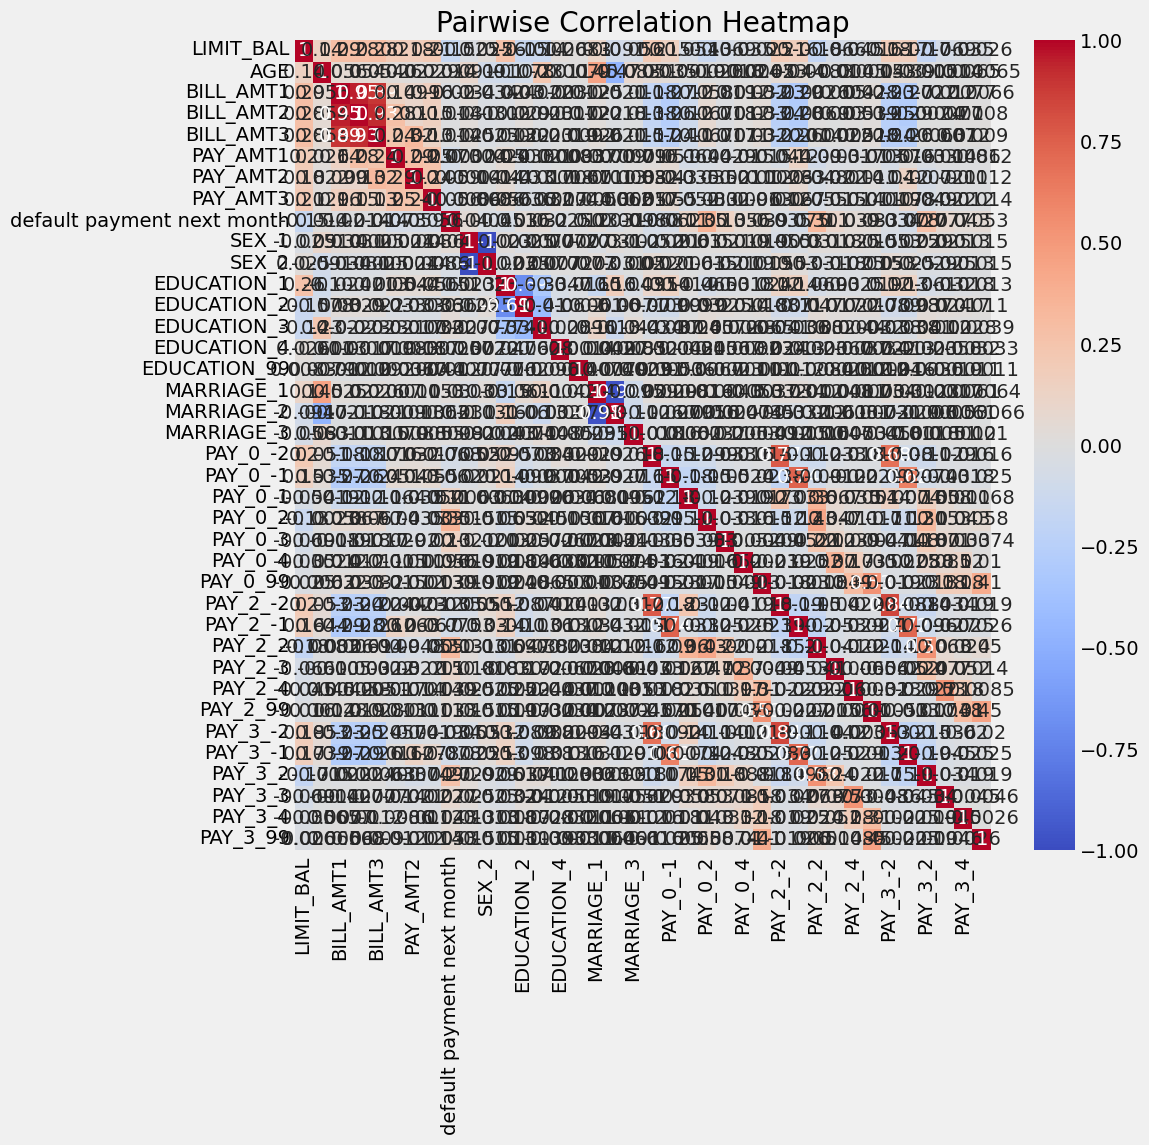

Highly correlated pairs above the threshold of 0.8:
('BILL_AMT2', 'BILL_AMT1')
('BILL_AMT3', 'BILL_AMT1')
('BILL_AMT3', 'BILL_AMT2')
('SEX_2', 'SEX_1')
('MARRIAGE_2', 'MARRIAGE_1')
('PAY_3_-2', 'PAY_2_-2')


In [28]:
# Step 5
# Generate a pairwise correlation table
correlation_matrix = data_with_dummies.corr()

# Display the correlation matrix
print("Pairwise Correlation Table:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.show()

# Check for collinearity and handle highly correlated variables if needed
threshold = 0.8
collinear_pairs = []

# Finding highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            colname_related = correlation_matrix.columns[j]
            collinear_pairs.append((colname, colname_related))

# Print highly correlated pairs
if collinear_pairs:
    print(f"Highly correlated pairs above the threshold of {threshold}:")
    for pair in collinear_pairs:
        print(pair)
else:
    print("No highly correlated pairs above the threshold.")

In [29]:
collinear_pairs

[('BILL_AMT2', 'BILL_AMT1'),
 ('BILL_AMT3', 'BILL_AMT1'),
 ('BILL_AMT3', 'BILL_AMT2'),
 ('SEX_2', 'SEX_1'),
 ('MARRIAGE_2', 'MARRIAGE_1'),
 ('PAY_3_-2', 'PAY_2_-2')]

## Logistic Regression

In [30]:
X = data_with_dummies.drop(columns='default payment next month')
y = data_with_dummies['default payment next month']

## Odds ratio

In [ ]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Extract coefficients, standard errors, p-values, and odds ratios
coefficients = result.params
standard_errors = result.bse
p_values = result.pvalues
odds_ratios = coefficients.apply(lambda x: round(np.exp(x), 4))

# Create a table combining coefficients, standard errors, p-values, and odds ratios
result_table = pd.DataFrame({'Coefficients': coefficients,
                             'Standard Errors': standard_errors,
                             'P-values': p_values,
                             'Odds Ratios': odds_ratios})

print(result_table)

         Current function value: 0.437624
         Iterations: 35
             Coefficients  Standard Errors       P-values   Odds Ratios
LIMIT_BAL       -0.000002     1.711140e-07   3.885050e-33  1.000000e+00
AGE              0.003928     1.957234e-03   4.478102e-02  1.003900e+00
BILL_AMT1       -0.000002     1.089867e-06   9.228260e-02  1.000000e+00
BILL_AMT2        0.000002     1.458530e-06   1.353006e-01  1.000000e+00
BILL_AMT3        0.000002     1.020229e-06   8.743940e-02  1.000000e+00
PAY_AMT1        -0.000013     2.364224e-06   1.850824e-08  1.000000e+00
PAY_AMT2        -0.000009     2.040601e-06   2.869866e-05  1.000000e+00
PAY_AMT3        -0.000003     1.508760e-06   2.996699e-02  1.000000e+00
SEX_1           -4.133529     5.618406e-01   1.879197e-13  1.600000e-02
SEX_2           -4.285936     5.609780e-01   2.170298e-14  1.380000e-02
EDUCATION_1      1.142306     2.199251e-01   2.057471e-07  3.134000e+00
EDUCATION_2      1.155562     2.191061e-01   1.334937e-07  3.175800e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Forward

In [ ]:
X = data_with_dummies.drop(columns='default payment next month')
y = data_with_dummies['default payment next month']

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
fw_vars = forward_selection(X, y)

In [ ]:
fw_vars

['PAY_0_2',
 'PAY_2_2',
 'PAY_0_3',
 'PAY_0_1',
 'PAY_3_2',
 'LIMIT_BAL',
 'PAY_0_4',
 'PAY_3_3',
 'PAY_0_-1',
 'PAY_2_-1',
 'MARRIAGE_1',
 'PAY_2_6',
 'PAY_2_7',
 'SEX_1',
 'SEX_2',
 'PAY_AMT1',
 'PAY_2_5',
 'PAY_3_-2',
 'BILL_AMT2',
 'PAY_2_3',
 'EDUCATION_4',
 'PAY_3_7',
 'PAY_0_5',
 'PAY_0_-2',
 'PAY_AMT2']

In [ ]:
X = data_with_dummies[fw_vars]
y = data_with_dummies['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [ ]:
# Fit logistic regression model
logreg_fw = LogisticRegression(max_iter=1000)
logreg_fw.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Reg results for 0.3 forward-selection
Accuracy: 0.6
Sensitivity : 0.61
Specificity : 0.6


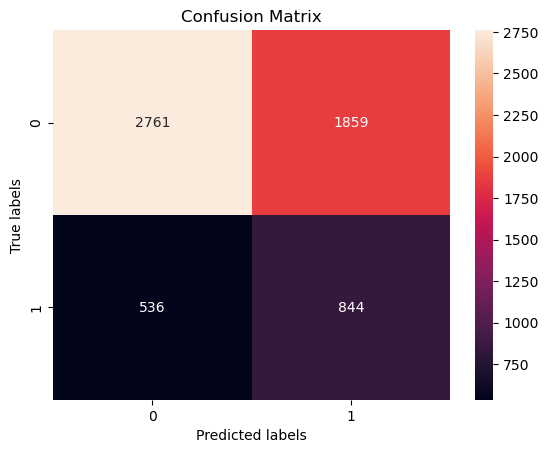

In [ ]:
# Predict
threshold = 0.3 # change thresh to desired cut-off
y_pred = (logreg_fw.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Evaluate the model accuracy

accuracy_fw = round(accuracy_score(y_test, y_pred), 2)
print(f"Logistic Reg results for {threshold} forward-selection")
print(f"Accuracy: {accuracy_fw}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred) # Test Confusion Matrix

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)


ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## Backward

In [ ]:
X = data_with_dummies.drop(columns='default payment next month')
y = data_with_dummies['default payment next month']

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
bw_vars = forward_selection(X, y)

In [ ]:
bw_vars

['PAY_0_2',
 'PAY_2_2',
 'PAY_0_3',
 'PAY_0_1',
 'PAY_3_2',
 'LIMIT_BAL',
 'PAY_0_4',
 'PAY_3_3',
 'PAY_0_-1',
 'PAY_2_-1',
 'MARRIAGE_1',
 'PAY_2_6',
 'PAY_2_7',
 'SEX_1',
 'SEX_2',
 'PAY_AMT1',
 'PAY_2_5',
 'PAY_3_-2',
 'BILL_AMT2',
 'PAY_2_3',
 'EDUCATION_4',
 'PAY_3_7',
 'PAY_0_5',
 'PAY_0_-2',
 'PAY_AMT2']

In [ ]:
X = data_with_dummies[bw_vars]
y = data_with_dummies['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
# Fit logistic regression model
logreg_bw = LogisticRegression(max_iter=1000)
logreg_bw.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Reg results for 0.5 backwards-selection
Accuracy: 0.78
Sensitivity : 0.0
Specificity : 1.0


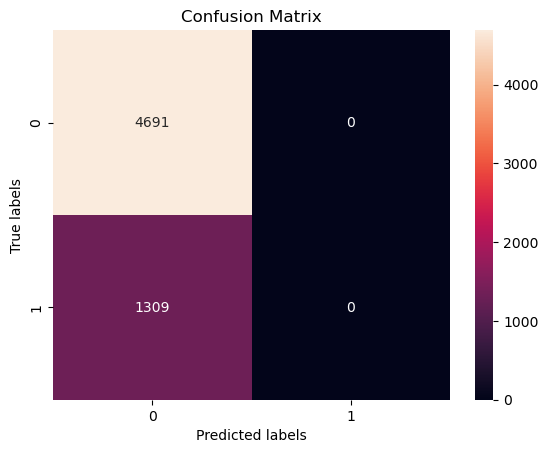

In [ ]:
# Predict
threshold = 0.5 # change thresh to desired cut-off
y_pred = (logreg_bw.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Evaluate the model accuracy

accuracy_bw = round(accuracy_score(y_test, y_pred), 2)
print(f"Logistic Reg results for {threshold} backwards-selection")
print(f"Accuracy: {accuracy_bw}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred) # Test Confusion Matrix

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)


ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## Step-wise

In [ ]:
X = data_with_dummies.drop(columns='default payment next month')
y = data_with_dummies['default payment next month']

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [ ]:
sw_vars = forward_selection(X, y)

In [ ]:
sw_vars

['PAY_0_2',
 'PAY_2_2',
 'PAY_0_3',
 'PAY_0_1',
 'PAY_3_2',
 'LIMIT_BAL',
 'PAY_0_4',
 'PAY_3_3',
 'PAY_0_-1',
 'PAY_2_-1',
 'MARRIAGE_1',
 'PAY_2_6',
 'PAY_2_7',
 'SEX_1',
 'SEX_2',
 'PAY_AMT1',
 'PAY_2_5',
 'PAY_3_-2',
 'BILL_AMT2',
 'PAY_2_3',
 'EDUCATION_4',
 'PAY_3_7',
 'PAY_0_5',
 'PAY_0_-2',
 'PAY_AMT2']

In [ ]:
X = data_with_dummies[sw_vars]
y = data_with_dummies['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
# Fit logistic regression model
logreg_sw = LogisticRegression(max_iter=1000)
logreg_sw.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Reg results for 0.3 step-wise
Accuracy: 0.6
Sensitivity : 0.6
Specificity : 0.59


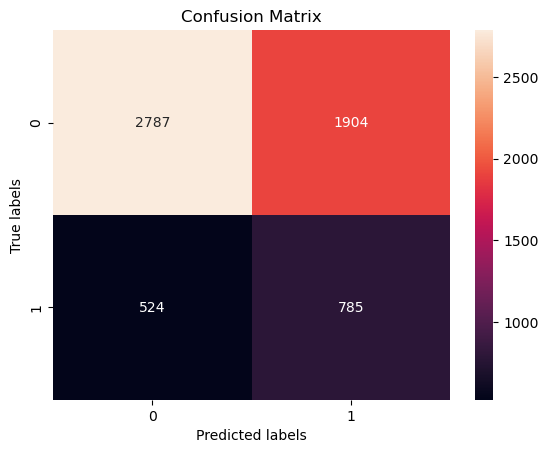

In [ ]:
# Predict
threshold = 0.3 # change thresh to desired cut-off
y_pred = (logreg_sw.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Evaluate the model accuracy

accuracy_bw = round(accuracy_score(y_test, y_pred), 2)
print(f"Logistic Reg results for {threshold} step-wise")
print(f"Accuracy: {accuracy_bw}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred) # Test Confusion Matrix

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)


ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## kNN

In [ ]:
# Introduce the X and y variables as done for the above model
# Using features variables from step-wise Log Reg


X = data_with_dummies[fw_vars]
y = data_with_dummies['default payment next month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
error_rate=[] #list that will store the average error rate value of k

for i in range (1,35,2):  #Took the range of k from 1 to 35
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    y_pred = (clf.predict_proba(X_test)[:, 1] > threshold).astype('float')

    error_rate.append(np.mean(predict_i!=y_test))

k = error_rate.index(min(error_rate))*2+1

print(f"Min Error rate: {min(error_rate)}\nBest K: {error_rate.index(min(error_rate))*2+1}")

Min Error rate: 0.20716666666666667
Best K: 23


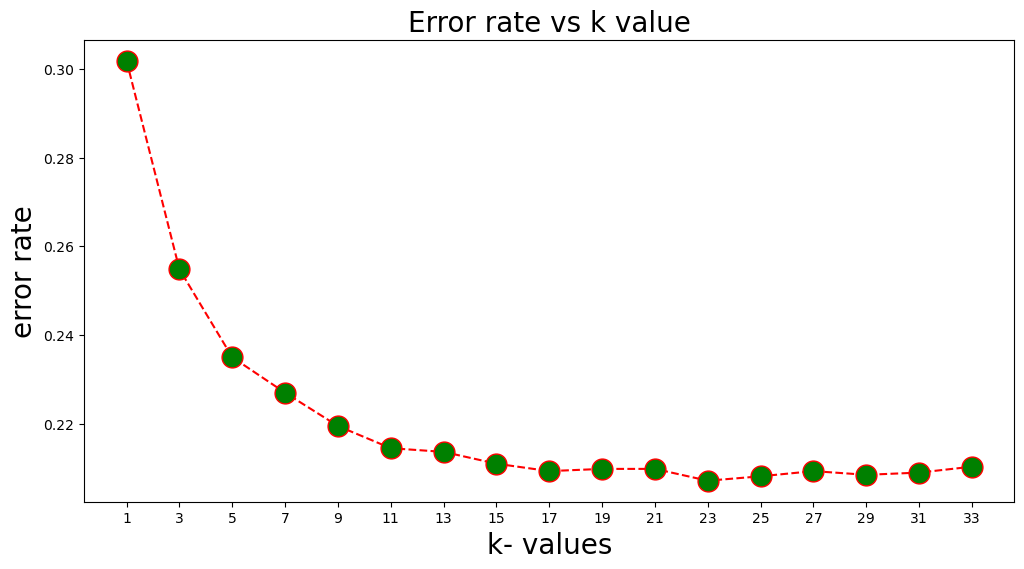

In [ ]:
#plotting the error rate vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1,35,2),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,35,2))
plt.show()

In [ ]:
# Do standardized scaling before performing KNN
# Initialise Standard scaler
scaler = StandardScaler()


# Fit the scaler on both training and testing data to ensure scaling is consistent across the entire dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement KNN Model
knclf = KNeighborsClassifier(n_neighbors=k)

# Train the model
knclf.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=23)

kNN results for 0.3 cut-off
Accuracy: 0.69
Sensitivity : 0.4
Specificity : 0.77


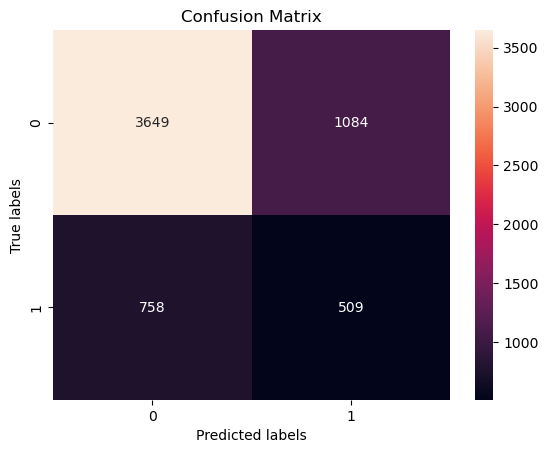

In [ ]:
# Predict
threshold = 0.3 # change thresh to desired cut-off
y_pred = (knclf.predict_proba(X_test)[:, 1] > threshold).astype('float')


# Evaluate the model accuracy

accuracy = round(accuracy_score(y_test, y_pred), 2)
print(f"kNN results for {threshold} cut-off")
print(f"Accuracy: {accuracy}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred)

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)




ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);



## Classification Tree

In [ ]:
# Assuming 'default payment next month' is the target variable
# Identify other columns as features (X) excluding the target column
X = data_with_dummies.drop('default payment next month', axis=1)
y = data_with_dummies['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)


### Running without pruning

Regular Classification Tree results 
Accuracy: 0.73
Sensitivity : 0.43
Specificity : 0.81


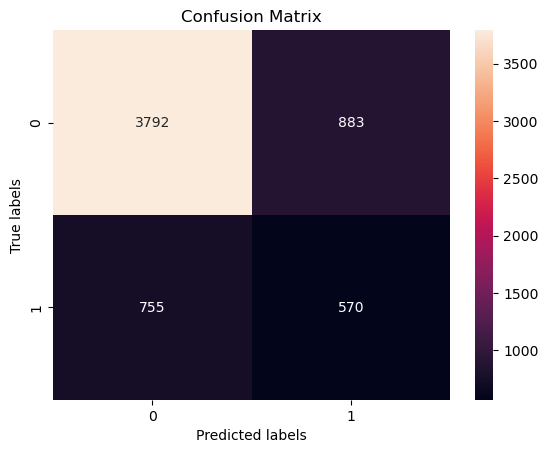

In [ ]:
# create model
clf = DecisionTreeClassifier(random_state=42)

# fit the model
clf.fit(X_train, y_train)

# Predict
threshold = 0. # change thresh to desired cut-off
y_pred = (clf.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Evaluate the model accuracy

accuracy = round(accuracy_score(y_test, y_pred), 2)
print(f"Regular Classification Tree results ")
print(f"Accuracy: {accuracy}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred) # Test Confusion Matrix

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)


ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

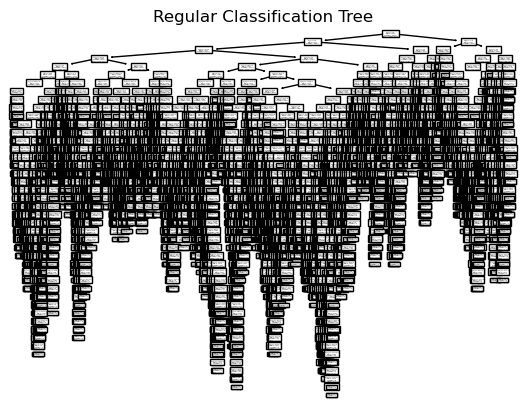

In [ ]:
tree.plot_tree(clf.fit(X, y))

plt.title("Regular Classification Tree")
plt.show()

### Min error tree
- find the parameter combo of the lowest validation error

In [ ]:
# Define hyperparameters to search
param_grid = {
    'max_depth': range(1, 30),
    'min_samples_leaf': range(1, 30, 5)
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_max_depth_me = grid_search.best_params_['max_depth']
best_min_samples_leaf_me = grid_search.best_params_['min_samples_leaf']
best_estimator_me = grid_search.best_estimator_

# Evaluate the best estimator on the test set
test_accuracy_me = best_estimator_me.score(X_test, y_test)

print(f"Best max_depth: {best_max_depth_me}")
print(f"Best min_samples_leaf: {best_min_samples_leaf_me}")

Best max_depth: 4
Best min_samples_leaf: 26


Classification Tree results for 0.3 cut-off (min error)
Accuracy: 0.81
Sensitivity : 0.47
Specificity : 0.9


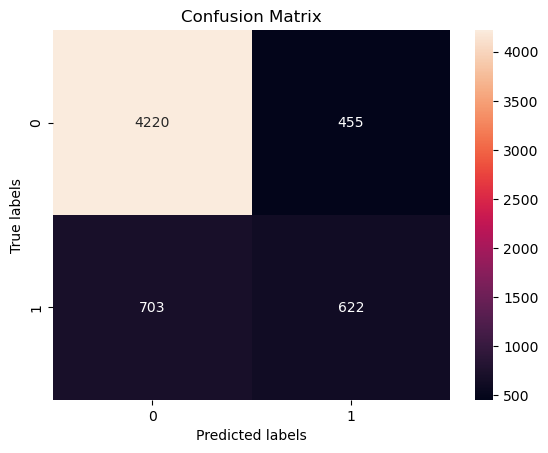

In [ ]:
# create model
min_error_tree = DecisionTreeClassifier(criterion='gini',max_depth=best_max_depth_me,min_samples_leaf=best_min_samples_leaf_me,random_state=42)

# fit the model
min_error_tree.fit(X, y)

# Predict
threshold = 0.3 # change thresh to desired cut-off
y_pred = (min_error_tree.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Evaluate the model accuracy

accuracy_me = round(accuracy_score(y_test, y_pred), 2)
print(f"Classification Tree results for {threshold} cut-off (min error)")
print(f"Accuracy: {accuracy_me}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred) # Test Confusion Matrix

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)


ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

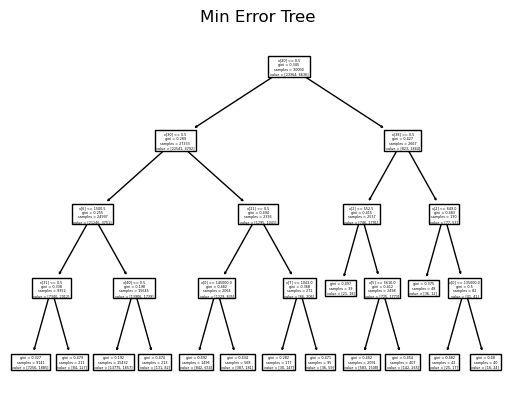

In [ ]:
tree.plot_tree(min_error_tree.fit(X, y))

plt.title("Min Error Tree")
plt.show()


### Best pruned tree
- find the parameter combo of the validation error closest to target error (min error plus S.E.)

In [ ]:
param_grid = {
    'max_depth': range(1, 30),
    'min_samples_leaf': range(1, 30, 5)
}


# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the validation errors for each parameter combination
val_errors = 1 - grid_search.cv_results_['mean_test_score']
min_error = min(val_errors)
K = 5  # Number of folds in cross-validation
std_error = np.std(val_errors) / np.sqrt(K)
target_error = min_error + std_error

# Find the parameter combination closest to the target error
best_idx = np.argmin(np.abs(val_errors - target_error))
best_max_depth_bp = grid_search.cv_results_['param_max_depth'][best_idx]
best_min_samples_leaf_bp = grid_search.cv_results_['param_min_samples_leaf'][best_idx]
best_estimator_bp = grid_search.best_estimator_

# Evaluate the best estimator on the test set
test_accuracy_bp = best_estimator_bp.score(X_test, y_test)

print(f"Best max_depth: {best_max_depth_bp}")
print(f"Best min_samples_leaf: {best_min_samples_leaf_bp}")

Best max_depth: 11
Best min_samples_leaf: 26


Classification Tree results for 0.3 cut-off (best pruned)
Accuracy: 0.81
Sensitivity : 0.55
Specificity : 0.88


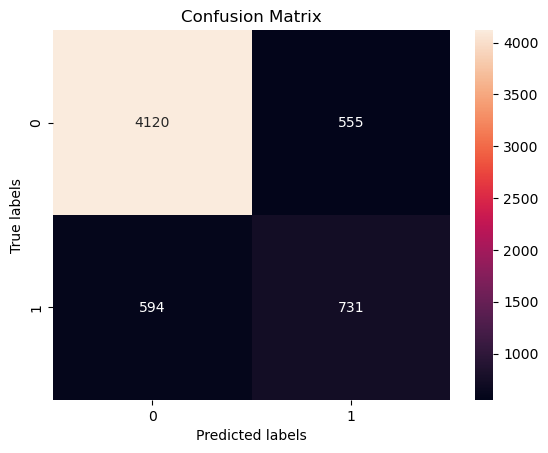

In [ ]:
# create model
best_pruned = DecisionTreeClassifier(criterion='gini',max_depth=best_max_depth_bp,min_samples_leaf=best_min_samples_leaf_bp,random_state=42)

# fit the model
best_pruned.fit(X, y)

# Predict
threshold = 0.3 # change thresh to desired cut-off
y_pred = (best_pruned.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Evaluate the model accuracy

accuracy_bp = round(accuracy_score(y_test, y_pred), 2)
print(f"Classification Tree results for {threshold} cut-off (best pruned)")
print(f"Accuracy: {accuracy_bp}")

# Acquire Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred) # Test Confusion Matrix

c_matrix_sens = round(c_matrix[1,1]/(sum(c_matrix[1])), 2)
print('Sensitivity :', c_matrix_sens )

c_matrix_spec = round(c_matrix[0,0]/(sum(c_matrix[0])), 2)
print('Specificity :', c_matrix_spec)


ax= plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

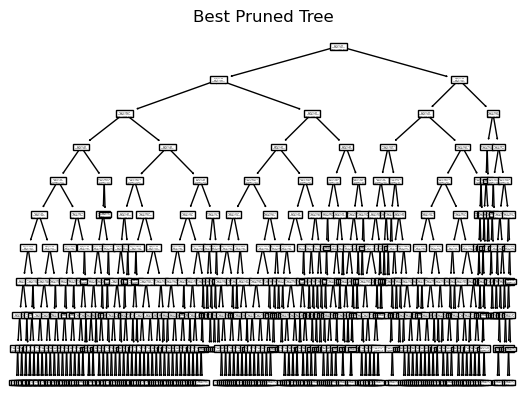

In [ ]:
tree.plot_tree(best_pruned.fit(X, y))

plt.title("Best Pruned Tree")
plt.show()